In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

2024-07-08 22:36:18.309946: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 22:36:18.949923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 1966 files belonging to 2 classes.
Using 1573 files for training.
Found 1966 files belonging to 2 classes.
Using 393 files for validation.


2024-07-08 22:36:19.772451: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-07-08 22:36:19.970392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


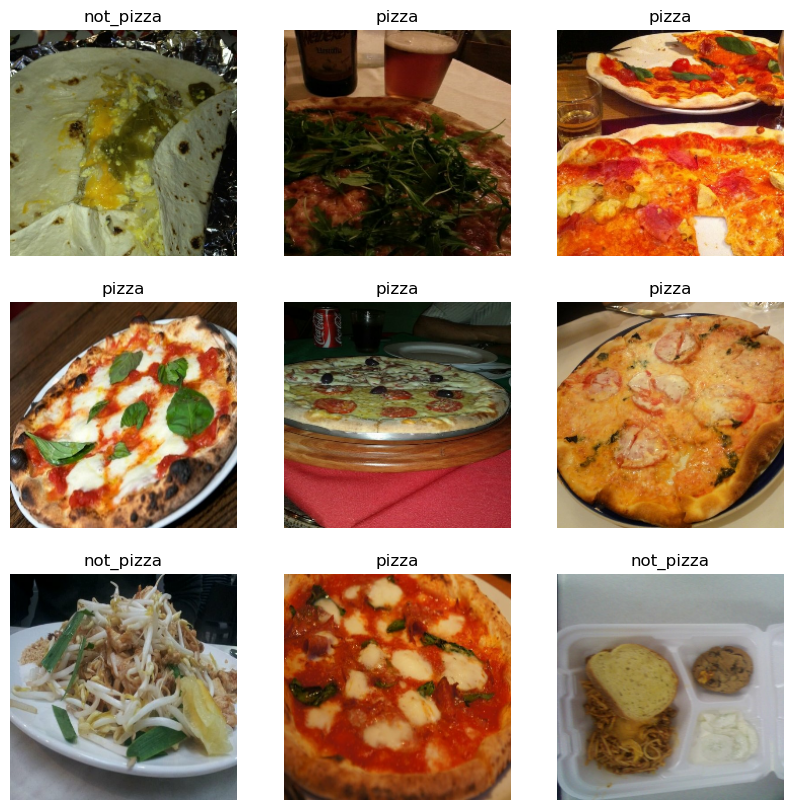

In [2]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
	directory='pizza_not_pizza',
	labels="inferred",
	label_mode="int",
	class_names=["pizza", "not_pizza"],
	color_mode="rgb",
	image_size=(224, 224),
	shuffle=True,
	batch_size=32,
	seed=42,
	validation_split=0.2,
	subset="training"
)



test_data = tf.keras.preprocessing.image_dataset_from_directory(
	directory='pizza_not_pizza',
	labels="inferred",
	label_mode="int",
	class_names=["pizza", "not_pizza"],
	color_mode="rgb",
	image_size=(224, 224),
	shuffle=True,
	batch_size=32,
	seed=42,
	validation_split=0.2,
	subset="validation"
)

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
	for i in range(9):
		ax = plt.subplot(3, 3, i+1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title('pizza' if labels[i] == 0 else 'not_pizza')
		plt.axis("off")
plt.show()

In [3]:
model = tf.keras.Sequential([
	tf.keras.layers.InputLayer(shape=(224, 224, 3)),
	tf.keras.layers.Rescaling(1./255),
	tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"),
	tf.keras.layers.MaxPool2D(pool_size=2),
	tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
	tf.keras.layers.MaxPool2D(pool_size=2),
	tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
	tf.keras.layers.MaxPool2D(pool_size=2),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation="relu"),
	tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,792,609 (10.65 MB)

 Trainable params: 2,792,609 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(
	optimizer="adam",
	loss="binary_crossentropy",
	metrics=[
		"accuracy"
])

In [5]:
history = model.fit(
	train_data,
	validation_data=test_data,
	epochs=5
)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 500ms/step - accuracy: 0.5356 - loss: 0.7273 - val_accuracy: 0.6667 - val_loss: 0.5902
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 495ms/step - accuracy: 0.6790 - loss: 0.5923 - val_accuracy: 0.6590 - val_loss: 0.5978
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 505ms/step - accuracy: 0.7253 - loss: 0.5703 - val_accuracy: 0.7481 - val_loss: 0.4791
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 506ms/step - accuracy: 0.7495 - loss: 0.5043 - val_accuracy: 0.7786 - val_loss: 0.4460
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 506ms/step - accuracy: 0.8179 - loss: 0.4120 - val_accuracy: 0.7506 - val_loss: 0.5177


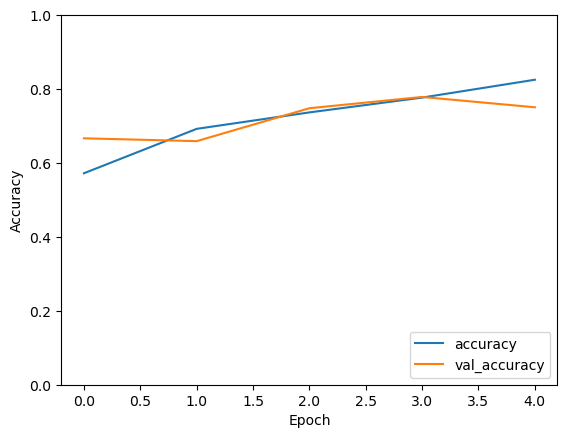

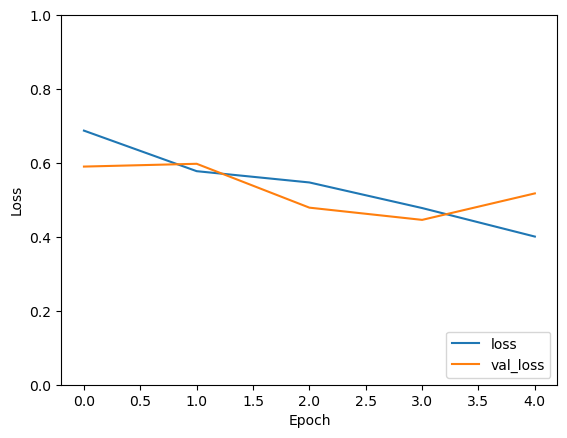

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


2024-07-08 22:38:28.248678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


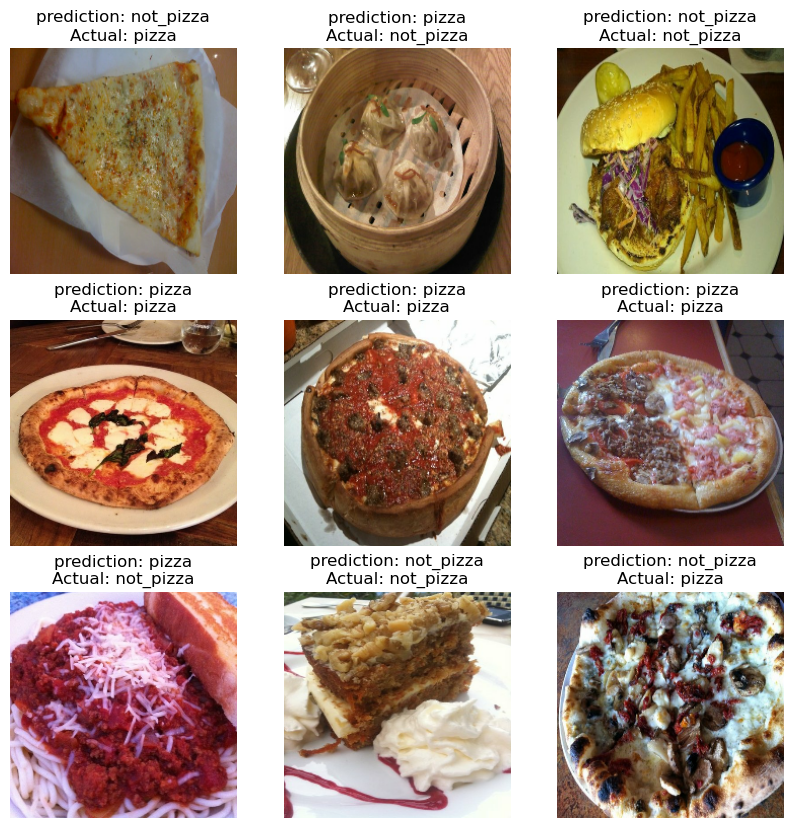

In [7]:
fig = plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
	for i in range(9):
		ax = plt.subplot(3, 3, i+1)
		plt.imshow(images[i].numpy().astype("int"))
		pred = model.predict(images[i].numpy().reshape(1, 224, 224, 3)).squeeze()
		pred = 'pizza' if pred <= 0.5 else 'not_pizza'
		plt.title('prediction: ' + pred + '\nActual: ' + ('pizza' if labels[i] == 0 else 'not_pizza'))
		plt.axis("off")
plt.show()

In [8]:
model.evaluate(test_data, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.7636 - loss: 0.5126


{'accuracy': 0.7506361603736877, 'loss': 0.517653226852417}